In [1]:
# Stock market Analysis

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from datetime import datetime


In [4]:
from pandas_datareader import data, wb

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [8]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-22,1086.589966,1066.689941,1083.560059,1069.729980,1090000,1069.729980
2018-05-23,1080.780029,1061.709961,1065.130005,1079.689941,1030000,1079.689941
2018-05-24,1080.469971,1066.150024,1079.000000,1079.239990,766800,1079.239990
2018-05-25,1082.560059,1073.775024,1079.020020,1075.660034,899400,1075.660034
2018-05-29,1073.369995,1055.219971,1064.890015,1060.319946,1865100,1060.319946


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,193.552302,189.741865,191.638254,191.728849,3.225138e+07,189.950583
std,21.519315,21.241138,21.341770,21.363512,1.410536e+07,20.937869
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.967499,173.947498,174.872501,174.945000,2.268465e+07,174.273876
50%,191.970001,189.324997,190.695000,190.855003,2.875150e+07,188.411995
75%,210.074997,206.832497,208.305000,208.872498,3.865015e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-05-22 to 2019-05-22
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


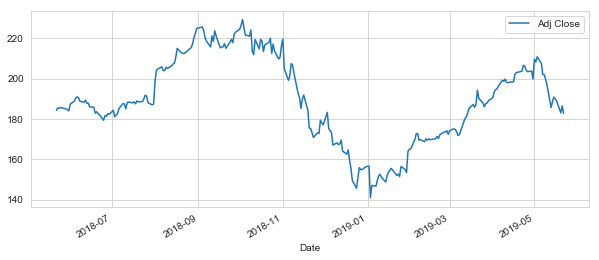

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

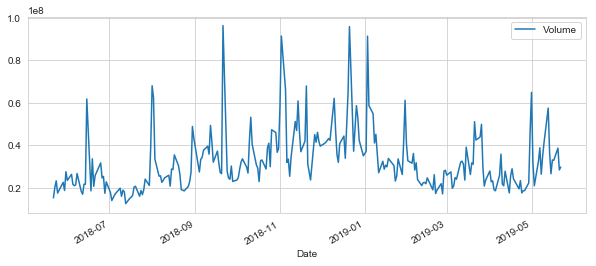

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s day" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

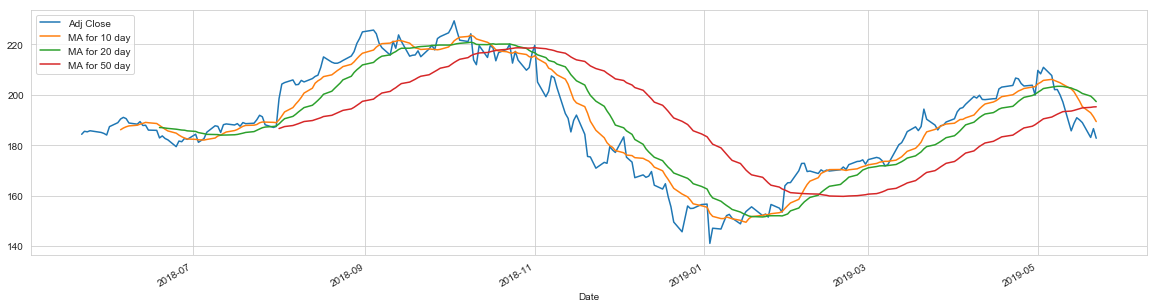

In [14]:
AAPL[['Adj Close','MA for 10 day','MA for 20 day','MA for 50 day']].plot(subplots=False,figsize=(20,5))

In [15]:
#daily returns 

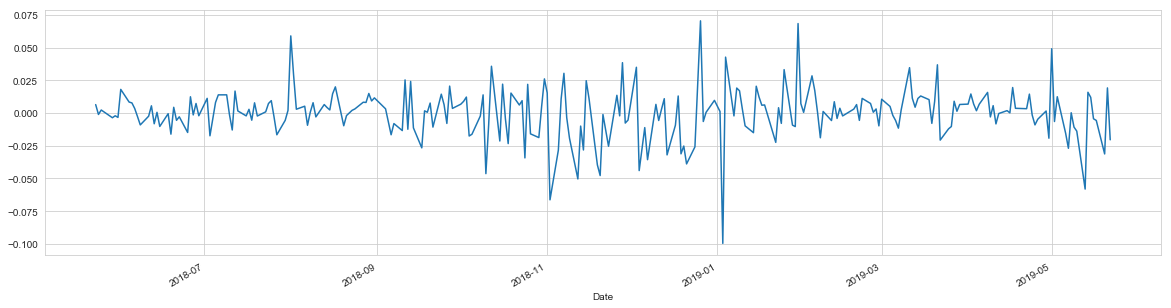

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(subplots=False,figsize=(20,5))

/home/springpc-1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


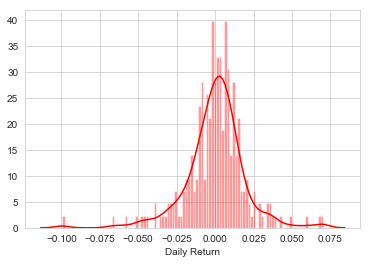

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='Red')

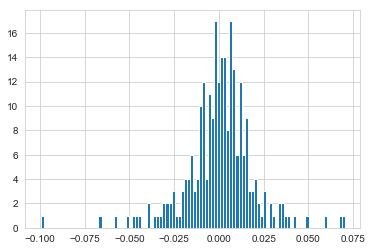

In [18]:
AAPL['Daily Return'].dropna().hist(bins=100)

In [19]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-22,184.353760,1581.400024,1069.729980,95.942047
2018-05-23,185.535767,1601.859985,1079.689941,97.083504
2018-05-24,185.328918,1603.069946,1079.239990,96.739098
2018-05-25,185.752487,1610.150024,1075.660034,96.788300
2018-05-29,185.082672,1612.869995,1060.319946,96.443893


In [21]:
tech_rets = closing_df.pct_change()

In [22]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-22,NaN,NaN,NaN,NaN
2018-05-23,0.006412,0.012938,0.009311,0.011897
2018-05-24,-0.001115,0.000755,-0.000417,-0.003548
2018-05-25,0.002285,0.004417,-0.003317,0.000509
2018-05-29,-0.003606,0.001689,-0.014261,-0.003558


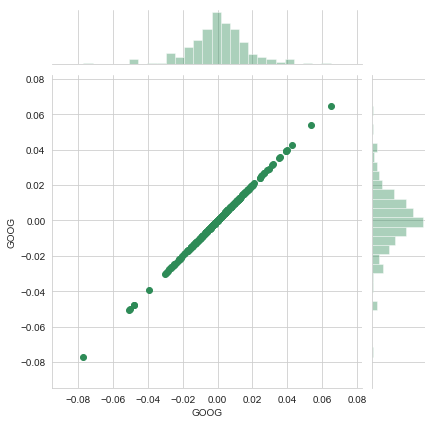

In [23]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

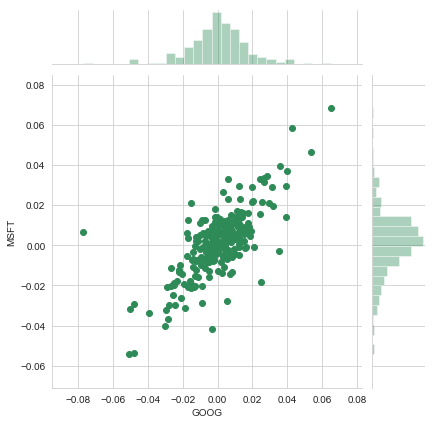

In [24]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

In [25]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-22,NaN,NaN,NaN,NaN
2018-05-23,0.006412,0.012938,0.009311,0.011897
2018-05-24,-0.001115,0.000755,-0.000417,-0.003548
2018-05-25,0.002285,0.004417,-0.003317,0.000509
2018-05-29,-0.003606,0.001689,-0.014261,-0.003558


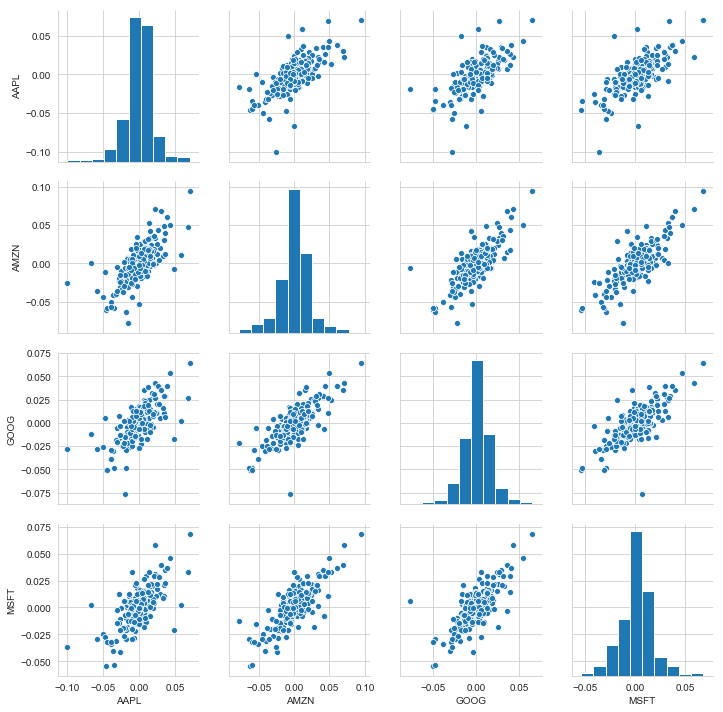

In [26]:
sns.pairplot(tech_rets.dropna())

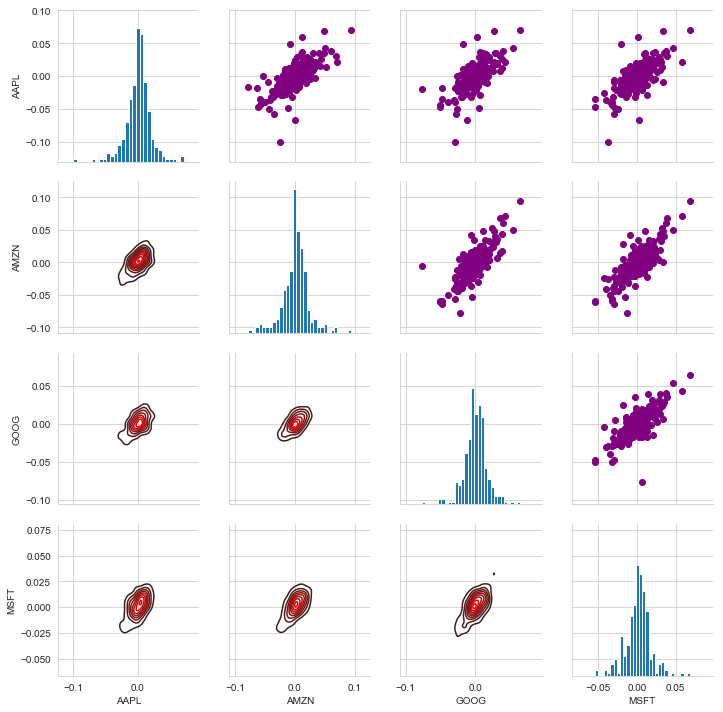

In [27]:
ret_fig = sns.PairGrid(tech_rets.dropna())

ret_fig.map_upper(plt.scatter,color='purple')

ret_fig.map_lower(sns.kdeplot,color='red')

ret_fig.map_diag(plt.hist,bins=30)


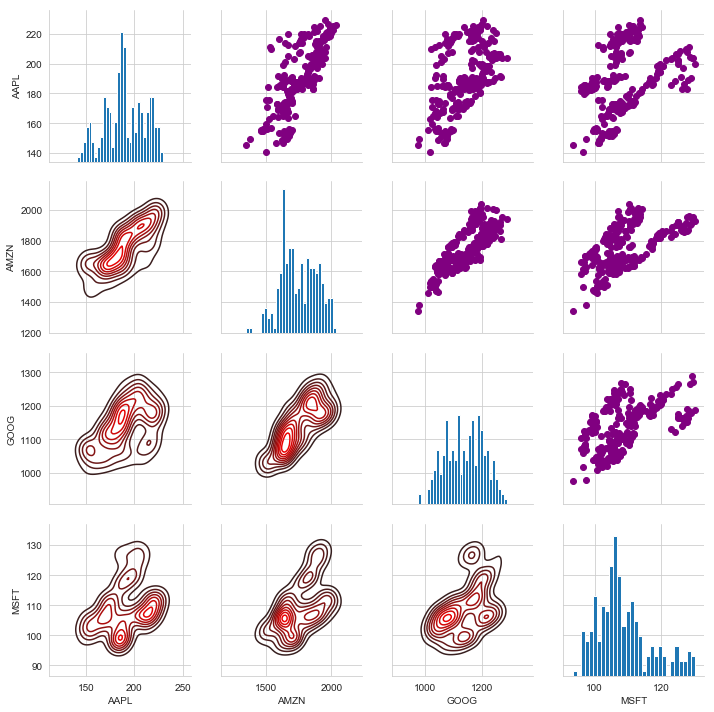

In [28]:
ret_fig = sns.PairGrid(closing_df)

ret_fig.map_upper(plt.scatter,color='purple')

ret_fig.map_lower(sns.kdeplot,color='red')

ret_fig.map_diag(plt.hist,bins=30)

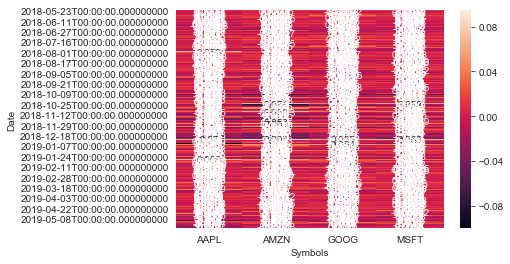

In [29]:
sns.heatmap(tech_rets.dropna(),annot=True)

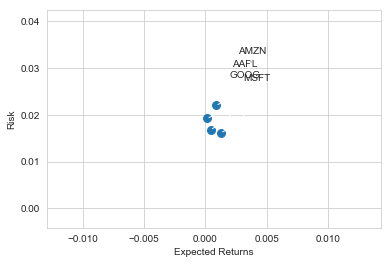

In [30]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy= (x,y), xytext=(50,50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

In [31]:
#value at risk

/home/springpc-1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


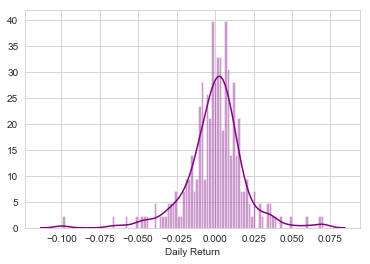

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [33]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-23,0.006412,0.012938,0.009311,0.011897
2018-05-24,-0.001115,0.000755,-0.000417,-0.003548
2018-05-25,0.002285,0.004417,-0.003317,0.000509
2018-05-29,-0.003606,0.001689,-0.014261,-0.003558
2018-05-30,-0.002129,0.007453,0.007055,0.009591


In [34]:
rets['AAPL'].quantile(0.05)

-0.031230763109850623

In [35]:
#value using monte carlo method

In [36]:
days = 365

dt = 1 / days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [38]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x  in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu  * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x]+shock[x]))
        
    return price

In [39]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-22,1086.589966,1066.689941,1083.560059,1069.729980,1090000,1069.729980
2018-05-23,1080.780029,1061.709961,1065.130005,1079.689941,1030000,1079.689941
2018-05-24,1080.469971,1066.150024,1079.000000,1079.239990,766800,1079.239990
2018-05-25,1082.560059,1073.775024,1079.020020,1075.660034,899400,1075.660034
2018-05-29,1073.369995,1055.219971,1064.890015,1060.319946,1865100,1060.319946


Text(0.5, 1.0, 'Monte carlo analysis for google')

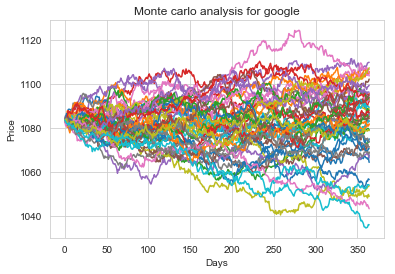

In [41]:
start_price  = 1083.56

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analysis for google')

In [43]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   1.,   1.,   0.,   2.,   2.,   4.,   1.,   2.,
          3.,   0.,   4.,   3.,   5.,   7.,   4.,   4.,   5.,   6.,   6.,
          9.,  14.,   8.,  12.,  12.,  10.,  14.,  13.,  14.,  22.,  22.,
         21.,  26.,  25.,  30.,  32.,  30.,  37.,  40.,  41.,  51.,  48.,
         58.,  34.,  58.,  65.,  55.,  60.,  62.,  62.,  69.,  74.,  83.,
         89.,  88.,  93., 106.,  95., 113.,  93., 112.,  97., 126., 120.,
        120., 110., 132., 126., 141., 152., 151., 120., 126., 145., 148.,
        150., 179., 149., 178., 148., 143., 157., 151., 124., 183., 134.,
        143., 161., 149., 135., 150., 151., 129., 135., 150., 139., 149.,
        116., 128., 126., 106., 129., 112., 124., 110., 106.,  89.,  92.,
         92.,  80.,  79.,  65.,  72.,  94.,  78.,  68.,  61.,  55.,  54.,
         52.,  49.,  48.,  45.,  42.,  38.,  42.,  38.,  40.,  31.,  22.,
         24.,  23.,  19.,  15.,  37., 

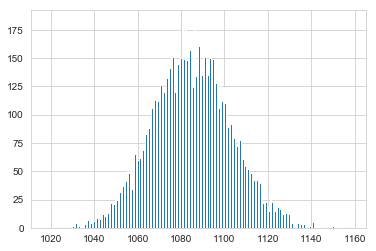

In [44]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)
